In [1]:
import math

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

### Сгенерируем датасет с помощью данного фреймоворка

In [40]:
from Data_generator.func_generator import generate_dataset, generate_complex_function

In [41]:
from Data_generator import functions as f

In [42]:
fun, s = generate_complex_function(np.array([f.sin, f.ln]), 2, chances_count= 1)
vf = np.vectorize(fun)

[-0.55325915]


In [43]:
dataset = generate_dataset(fun, 1000)
X, y = dataset[0], dataset[1]
y = y.squeeze()

### Посмотрим на то, как выглядит наша сложная функция

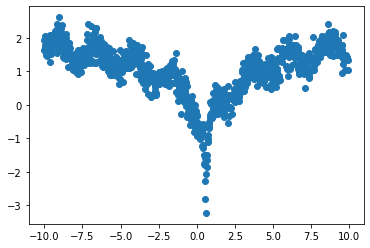

In [44]:
plt.scatter(X, y, marker='o')

In [45]:
s

' +0.2973832593 × ln(+2.730256x -1.563432) -1.0637559411 × sin(+2.478828x +2.263235) -0.553259'

### Построим датасет из полиномов от X_train

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
#X_train, X_test = np.array([[x**1, x**2, x**3, x**4, x**5, math.sin(x)] for x in X_train]), np.array([[x**1, x**2, x**3, x**4, x**5, math.sin(x)] for x in X_test])

### Реализуем наши функции ошибки (не забываем отнормировать на количество сэмплов в датасете)

In [49]:
from Data_generator.functions import sin

In [50]:
from Data_generator.functions import exp, hyper, linear, ln, sin, sqr,sqrt

In [51]:
?sqr

In [52]:
from functools import partial

Веса:<br>
[0] - x**1 <br>
[1] - x**2 <br>
[2] - x**3 <br><br>

[3] - sin dx <br>
[4] - sin ax <br>
[5] - sin a <br><br>

[6] - exp dx <br>
[7] - exp ax <br>
[8] - exp a <br><br>

[9] - hyper dx <br>
[10] - hyper ax <br>
[11] - hype a <br><br>

[12] - linear dx <br>
[13] - linear ax <br>
[14] - linear a <br><br>

[15] - ln dx <br>
[16] - ln ax <br>
[17] - ln a <br><br>

[18] - sqr dx <br>
[19] - sqr ax <br>
[20] - sqr a <br><br>

[21] - a <br>

[22] - sqrt dx <br>
[23] - sqrt ax <br>
[24] - sqrt a <br>


In [53]:
def get_sin_func(weights):
    return np.vectorize(partial(sin, dx = weights[3], ax =weights[4], a=weights[5]))

In [54]:
def get_poly_func(weights):
    return np.vectorize((lambda x : weights[0] * x**1 + weights[1] * x**2 + weights[2] * x**3))

In [55]:
def get_exp_func(weights):
    return np.vectorize(partial(exp, dx = weights[6], ax =weights[7], a=weights[8]))

In [56]:
def get_hyper_func(weights):
    return np.vectorize(partial(hyper, dx = weights[9], ax =weights[10], a=weights[11]))

In [57]:
def get_linear_func(weights):
    return np.vectorize(partial(linear, dx = weights[12], ax =weights[13], a=weights[14]))

In [58]:
def get_ln_func(weights):
    return np.vectorize(partial(ln, dx = weights[15], ax =weights[16], a=weights[17]))

In [59]:
def get_sqr_func(weights):
    return np.vectorize(partial(sqr, dx = weights[18], ax =weights[19], a=weights[20]))

In [60]:
def get_sqrt_func(weights):
    return np.vectorize(partial(sqrt, dx = weights[22], ax =weights[23], a=weights[24]))

In [61]:
def get_super_predict(weights, x):
    return weights[-1] + get_sin_func(weights)(x) + get_ln_func(weights)(x) + get_linear_func(weights)(x) + get_exp_func(weights)(x) +  get_sqr_func(weights)(x) + get_hyper_func(weights)(x)+get_exp_func(weights)(x) +  get_sqrt_func(weights)(x)

In [62]:
def mse_sin_ln(weights, x = X_train, y= y_train):
    
    predict = get_super_predict(weights,x)
    
    return sum((y - predict)**2 / x.shape[0])

In [63]:
def l1(weights, x = X_train, y = y_train):
    predict = get_super_predict(weights,x)
    return sum(np.abs(y - predict)/ x.shape[0])

### Подключим библиотеки для построения графиков и посмотрим на распределение y

In [64]:
X_train[0]

6.2086777474372425

In [67]:
from __future__ import division
import random
import math

#--- COST FUNCTION 
# function we are attempting to optimize (minimize)
#--- MAIN 
class Particle:
    def __init__(self,x0):
        self.position_i=[]          # particle position
        self.velocity_i=[]          # particle velocity
        self.pos_best_i=[]          # best position individual
        self.err_best_i=-1          # best error individual
        self.err_i=-1               # error individual

        for i in range(0,num_dimensions):
            self.velocity_i.append(random.uniform(-1, 1))
            self.position_i.append(random.uniform(-3, 3))

    # evaluate current fitness
    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i)

        # check to see if the current position is an individual best
        #print(self.err_i)
        #print(self.err_best_i)
        
        if self.err_best_i==-1 or self.err_i < self.err_best_i:
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i

    # update new particle velocity
    def update_velocity(self,pos_best_g):
        w=0.8       # constant inertia weight (how much to weigh the previous velocity)
        c1=1        # cognative constant
        c2=1        # social constant

        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()

            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    # update the particle position based off new velocity updates
    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]

            # adjust maximum position if necessary
            if self.position_i[i]>bounds[i][1]:
                self.position_i[i]=bounds[i][1]

            # adjust minimum position if neseccary
            if self.position_i[i] < bounds[i][0]:
                self.position_i[i]=bounds[i][0]
                
class PSO():
    def __init__(self,costFunc,x0,bounds,num_particles,maxiter, verbose=False):
        global num_dimensions
        
        self.err_best_g_hist = []
        self.pos_best_g_hist = []
        
        pos = []

        
        num_dimensions=len(x0)
        err_best_g=-1                   # best error for group
        pos_best_g=[]                   # best position for group

        # establish the swarm
        swarm=[]
        for i in range(0,num_particles):
            swarm.append(Particle(x0))

        # begin optimization loop
        i=0
        while i < maxiter:
            if verbose:
                print (i, " err_best_g : ", err_best_g)
            # cycle through particles in swarm and evaluate fitness
            for j in range(0,num_particles):
                swarm[j].evaluate(costFunc)

                # determine if current particle is the best (globally)
                if swarm[j].err_i < err_best_g or err_best_g == -1:
                    pos_best_g=list(swarm[j].position_i)
                    err_best_g=float(swarm[j].err_i)
                    self.err_best_g_hist.append(err_best_g)
                    self.pos_best_g_hist.append(pos_best_g)
            # cycle through swarm and update velocities and position
            for j in range(0,num_particles):
                swarm[j].update_velocity(pos_best_g)
                swarm[j].update_position(bounds)
            i+=1

        # print final results
        print('FINAL:')
        print("poly", pos_best_g[:3])
        print("sin", pos_best_g[3:6])
        print("exp", pos_best_g[6:9])
        print("hyp", pos_best_g[9:12])
        print("linear",pos_best_g[12:15])
        print("ln",pos_best_g[15:18])
        print("sqr",pos_best_g[18:21])
        print("sqr",pos_best_g[21:24])
        
        self.pos_best_g = pos_best_g
        #return np.array(pos_best_g)

if __name__ == "__PSO__":
    main()

#--- EXECUTE

initial = np.zeros(25)#X_train.shape[1])               # initial starting location [x1,x2...]
bounds=[(-25, 25)] * len(initial)  # input bounds [(x1_min,x1_max),(x2_min,x2_max)...]
pso = PSO(mse_sin_ln,initial,bounds,num_particles=400,maxiter=100, verbose=True)

0  err_best_g :  -1
1  err_best_g :  122.91654864663043
2  err_best_g :  18.58189434147009
3  err_best_g :  18.58189434147009
4  err_best_g :  18.58189434147009
5  err_best_g :  18.58189434147009
6  err_best_g :  18.243633718102263
7  err_best_g :  18.243633718102263
8  err_best_g :  18.243633718102263
9  err_best_g :  18.243633718102263
10  err_best_g :  18.243633718102263
11  err_best_g :  18.243633718102263
12  err_best_g :  18.243633718102263
13  err_best_g :  17.33509425483585
14  err_best_g :  8.706374051612293
15  err_best_g :  8.706374051612293
16  err_best_g :  8.706374051612293
17  err_best_g :  8.706374051612293
18  err_best_g :  8.706374051612293
19  err_best_g :  8.706374051612293
20  err_best_g :  8.706374051612293
21  err_best_g :  8.706374051612293
22  err_best_g :  8.706374051612293
23  err_best_g :  8.392683710276113
24  err_best_g :  8.392683710276113
25  err_best_g :  8.392683710276113
26  err_best_g :  8.392683710276113
27  err_best_g :  8.392683710276113
28  err_b

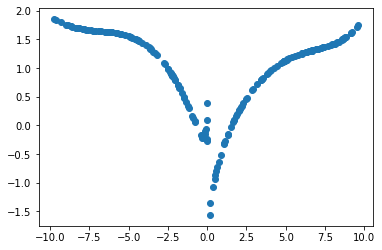

In [68]:
plt.scatter(X_test, get_super_predict(pso.pos_best_g, X_test), marker='o')

### Подключим библиотеку для построения графиков pygal

In [69]:
import pygal
from IPython.display import SVG, display

In [70]:
def print_pso_log_error_hist(train_error_hist, test_error_hist, title):
    line_chart = pygal.Line()
    line_chart.title = title
    #line_chart.x_labels = "iterations"#range(1, len(test_err_hist) + 1)
    line_chart.add('{}'.format("Log of Train error via iteration"), np.log(train_error_hist))
    line_chart.add('{}'.format("Log of Test error via iteration"), np.log(test_error_hist))
    display(SVG(line_chart.render(disable_xml_declaration=True)))

### Посмотрим на падение ошибки на тестовой и тренировочной выборках

### Падение ошибки для mse

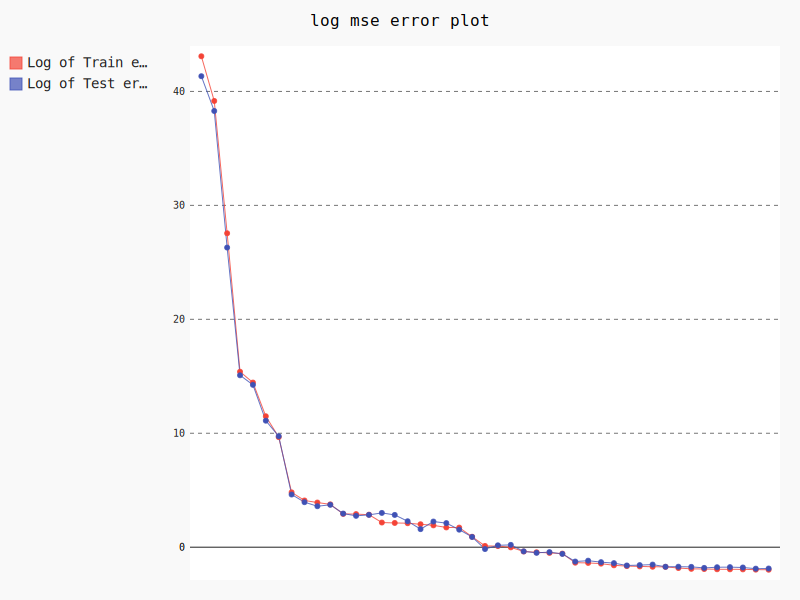

In [71]:
print_pso_log_error_hist(pso.err_best_g_hist,  [mse(pos_best_g, X_test, y_test) for pos_best_g in pso.pos_best_g_hist], "log mse error plot")

### Для L1

In [ ]:
pso_l1 = PSO(l1,initial,bounds,num_particles=1500,maxiter=100)
print_pso_log_error_hist(pso_l1.err_best_g_hist,  [l1(pos_best_g, X_test, y_test) for pos_best_g in pso_l1.pos_best_g_hist], "l1 mse error plot")